In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import sys
sys.path.append('../')
from src.d06_reporting.Gentrification import Gentrification
from src.d04_modeling import propositional_classifier as pc
gentrification = Gentrification()

In [11]:
df = pd.read_csv("~/displacement-typologies/data/outputs/typologies/SanFrancisco_typology_output.csv", sep=",")
block_df_dict = pd.read_excel("/share/data/school_choice/Data/SF 2010 blks 022119 with field descriptions (1).xlsx", None, engine='openpyxl')
updated_FRL = pd.read_excel("/share/data/school_choice/dssg/riyab_FRL_data.xlsx", None, engine='openpyxl')

<AxesSubplot:ylabel='CTIP_2013 assignment'>

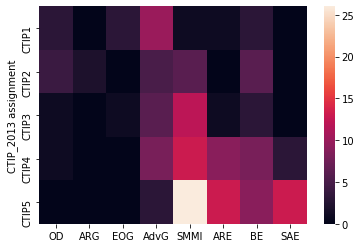

In [3]:
gentrification.gentrification_data(df, block_df_dict)

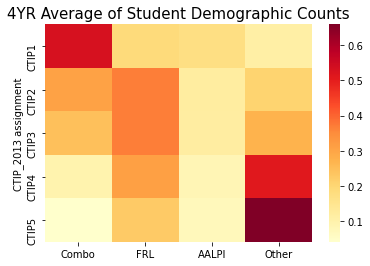

In [4]:
ax = gentrification.frl_vs_ctip(updated_FRL, block_df_dict)
plt.show()

../src/d06_reporting/Gentrification.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_Geoid_filtered["New Geoid"] = grouped_Geoid_filtered["Geoid Group"].astype(str).str[:10].astype(int)


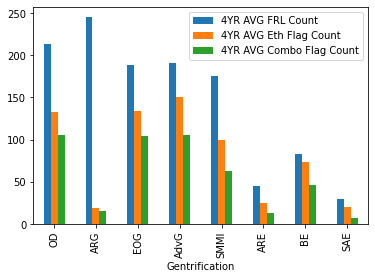

In [5]:
ax = gentrification.grouped_barchart(updated_FRL, df)[0]
plt.show()

../src/d06_reporting/Gentrification.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_Geoid_filtered["New Geoid"] = grouped_Geoid_filtered["Geoid Group"].astype(str).str[:10].astype(int)


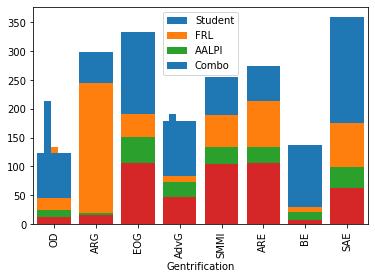

In [6]:
gentrification.stacked_barchart(updated_FRL, df)

In [12]:
pc6 = pc.PropositionalClassifier([("pctAALPI", "pctFRL"), "pctBoth"], ["and", "or"])
pc6.statement

'(pctAALPI >=  {0:.2f} and pctFRL >=  {1:.2f} ) or pctBoth >=  {2:.2f}'

In [13]:
params6 = [0.5, 0.8, 6] #parameters must match the features passed, in the order. Note the scale.
pred = pc6.get_solution_set(params6)
pred

Float64Index([   1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,    8.0,
                 9.0,   10.0,
              ...
              3279.0, 3286.0, 3290.0, 3294.0, 3295.0, 3298.0, 3301.0, 3303.0,
              3308.0, 3310.0],
             dtype='float64', name='group', length=119)

In [14]:
pc6_map = pc6.get_tiebreaker_map(params6, "geoid")
pc6_map.head(10)

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,statefp10,tractce10,uace10,ur10,geometry,group,geoid
geoid,,,,,,,,,,,,,,,,,
60750604001012,24367.0,0.0,1012,075,S,060750604001012,+37.7121909,-122.4982129,G5040,Block 1012,06,060400,None,None,"POLYGON ((-122.50022 37.71896, -122.50017 37.7...",NaN,NaN
60750604001011,284486.0,0.0,1011,075,S,060750604001011,+37.7142322,-122.4954137,G5040,Block 1011,06,060400,None,None,"POLYGON ((-122.50022 37.71896, -122.49985 37.7...",3247.0,NaN
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,06,017902,None,None,"POLYGON ((-122.36444 37.82451, -122.36651 37.8...",NaN,NaN
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,06,017902,None,None,"POLYGON ((-122.36370 37.82286, -122.36506 37.8...",NaN,NaN
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,06,017902,None,None,"POLYGON ((-122.36651 37.82427, -122.36444 37.8...",NaN,NaN
60750179021047,11399.0,0.0,1047,075,S,060750179021047,+37.8247122,-122.3675015,G5040,Block 1047,06,017902,None,None,"POLYGON ((-122.36660 37.82471, -122.36792 37.8...",NaN,NaN
60750179021046,36461.0,0.0,1046,075,S,060750179021046,+37.8234832,-122.3674891,G5040,Block 1046,06,017902,None,None,"POLYGON ((-122.36827 37.82230, -122.36883 37.8...",NaN,NaN
60750179021029,25186.0,0.0,1029,075,S,060750179021029,+37.8268222,-122.3689071,G5040,Block 1029,06,017902,None,None,"POLYGON ((-122.36900 37.82578, -122.37011 37.8...",NaN,NaN
60750179021019,24105.0,0.0,1019,075,S,060750179021019,+37.8283473,-122.3698805,G5040,Block 1019,06,017902,None,None,"POLYGON ((-122.37098 37.82884, -122.36975 37.8...",NaN,NaN


In [15]:
pc1 = pc.PropositionalClassifier(["pctAALPI", "pctFRL", "nBoth"], ["and", "or"])
pc1.statement

'pctAALPI >=  {0:.2f} and pctFRL >=  {1:.2f} or nBoth >=  {2:.2f}'

In [16]:
grouped_Geoid = gentrification.gentrification_vs_demo(updated_FRL, df)
grouped_Geoid.head(5)

../src/d06_reporting/Gentrification.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_Geoid_filtered["New Geoid"] = grouped_Geoid_filtered["Geoid Group"].astype(str).str[:10].astype(int)


,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification
GEOID,,,,,
6075010300,93.50,30.50,6.50,3.00,ARE
6075010400,122.75,50.75,13.75,2.25,ARE
6075010500,89.00,63.75,8.25,7.00,ARE
6075010700,422.25,344.50,25.75,21.00,OD
6075010800,154.25,105.25,6.75,3.75,BE


In [17]:
#gentrification_cols = ["OD", "ARG", "EOG", "AdvG", "SMMI", "ARE", "BE", "SAE"]
#gentrification_cols = [1 ,       2,     3,     4,     5,      6,     7,    8   ]
gentrification_values = []

for i in grouped_Geoid.index: 
    val = grouped_Geoid.loc[i, "Gentrification"]
    if val == "OD":
        gentrification_values.append(1)
    elif val == "ARG":
        gentrification_values.append(2)
    elif val == "EOG":
        gentrification_values.append(3)
    elif val == "AdvG":
        gentrification_values.append(4)
    elif val == "SMMI":
        gentrification_values.append(5)
    elif val == "ARE":
        gentrification_values.append(6)
    elif val == "BE":
        gentrification_values.append(7)
    elif val == "SAE":
        gentrification_values.append(8)

grouped_Geoid["New Gent"] = gentrification_values

In [18]:
grouped_Geoid.head(10)

,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
GEOID,,,,,,
6075010300,93.50,30.50,6.50,3.00,ARE,6
6075010400,122.75,50.75,13.75,2.25,ARE,6
6075010500,89.00,63.75,8.25,7.00,ARE,6
6075010700,422.25,344.50,25.75,21.00,OD,1
6075010800,154.25,105.25,6.75,3.75,BE,7
6075010900,43.75,11.50,4.00,0.75,SMMI,5
6075011000,146.00,93.75,6.75,3.75,BE,7
6075011100,118.75,83.25,23.75,16.00,ARE,6
6075011200,65.25,42.00,2.75,2.75,BE,7


In [19]:
pc6_map["New Geoid"] = pc6_map.index.astype(str).str[:10].astype(int)
pc6_map.head(5)

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,statefp10,tractce10,uace10,ur10,geometry,group,geoid,New Geoid
geoid,,,,,,,,,,,,,,,,,,
60750604001012,24367.0,0.0,1012,075,S,060750604001012,+37.7121909,-122.4982129,G5040,Block 1012,06,060400,None,None,"POLYGON ((-122.50022 37.71896, -122.50017 37.7...",NaN,NaN,6075060400
60750604001011,284486.0,0.0,1011,075,S,060750604001011,+37.7142322,-122.4954137,G5040,Block 1011,06,060400,None,None,"POLYGON ((-122.50022 37.71896, -122.49985 37.7...",3247.0,NaN,6075060400
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,06,017902,None,None,"POLYGON ((-122.36444 37.82451, -122.36651 37.8...",NaN,NaN,6075017902
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,06,017902,None,None,"POLYGON ((-122.36370 37.82286, -122.36506 37.8...",NaN,NaN,6075017902
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,06,017902,None,None,"POLYGON ((-122.36651 37.82427, -122.36444 37.8...",NaN,NaN,6075017902


In [20]:
merged_map = pc6_map.merge(grouped_Geoid, left_on = "New Geoid", right_index = True)
merged_map = geopandas.GeoDataFrame(merged_map)
merged_map.head(5)

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,...,geometry,group,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent
geoid,,,,,,,,,,,,,,,,,,,,,
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,...,"POLYGON ((-122.36444 37.82451, -122.36651 37.8...",NaN,NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,...,"POLYGON ((-122.36370 37.82286, -122.36506 37.8...",NaN,NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,...,"POLYGON ((-122.36651 37.82427, -122.36444 37.8...",NaN,NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021047,11399.0,0.0,1047,075,S,060750179021047,+37.8247122,-122.3675015,G5040,Block 1047,...,"POLYGON ((-122.36660 37.82471, -122.36792 37.8...",NaN,NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3
60750179021046,36461.0,0.0,1046,075,S,060750179021046,+37.8234832,-122.3674891,G5040,Block 1046,...,"POLYGON ((-122.36827 37.82230, -122.36883 37.8...",NaN,NaN,6075017902,291.75,231.0,192.25,157.25,EOG,3


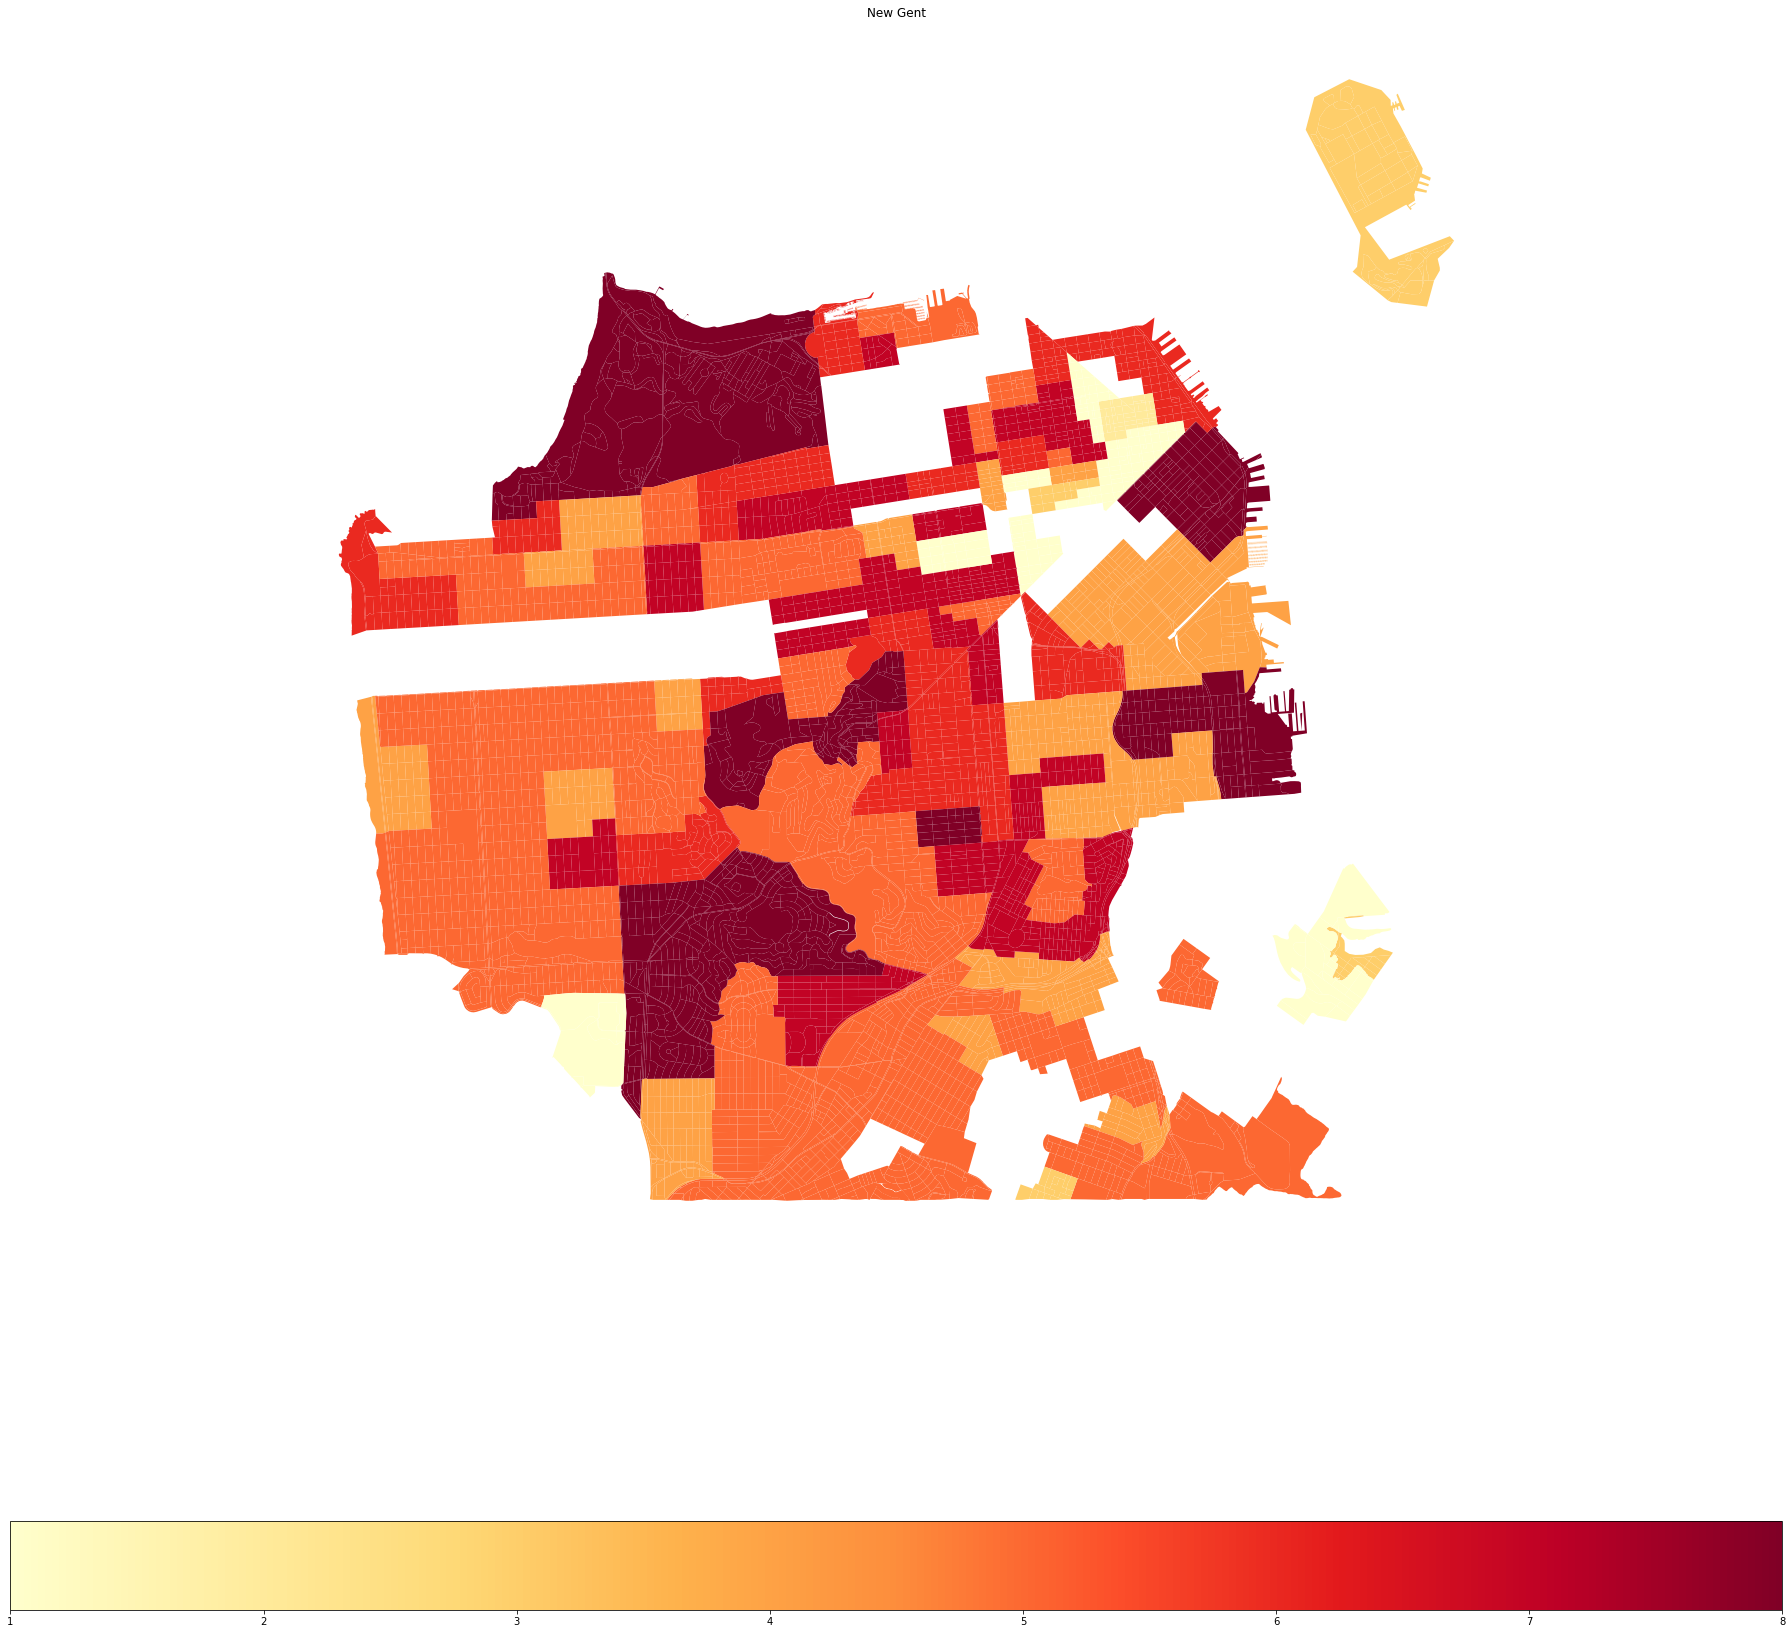

<AxesSubplot:title={'center':'New Gent'}>

In [21]:
pc6.plot_map_new(merged_map, params6)

In [26]:
solution_set = pc6.get_solution_set(params6)
solution_set

Float64Index([   1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,    8.0,
                 9.0,   10.0,
              ...
              3279.0, 3286.0, 3290.0, 3294.0, 3295.0, 3298.0, 3301.0, 3303.0,
              3308.0, 3310.0],
             dtype='float64', name='group', length=119)

In [30]:
merged_map

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,...,group,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent,tiebreaker
geoid,,,,,,,,,,,,,,,,,,,,,
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,...,NaN,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,...,NaN,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,...,NaN,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN
60750179021047,11399.0,0.0,1047,075,S,060750179021047,+37.8247122,-122.3675015,G5040,Block 1047,...,NaN,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN
60750179021046,36461.0,0.0,1046,075,S,060750179021046,+37.8234832,-122.3674891,G5040,Block 1046,...,NaN,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60750354005005,8445.0,0.0,5005,075,S,060750354005005,+37.7365851,-122.5057922,G5040,Block 5005,...,610.0,NaN,6075035400,534.50,229.25,52.25,27.00,SMMI,5,0.0
60750354005008,6889.0,0.0,5008,075,S,060750354005008,+37.7358777,-122.5036593,G5040,Block 5008,...,NaN,NaN,6075035400,534.50,229.25,52.25,27.00,SMMI,5,NaN
60750354005007,6320.0,0.0,5007,075,S,060750354005007,+37.7358576,-122.5047386,G5040,Block 5007,...,NaN,NaN,6075035400,534.50,229.25,52.25,27.00,SMMI,5,NaN


In [50]:
counter = 1
values = []
for i in merged_map.index: 
    if counter in solution_set: 
        values.append(1)
    else:
        values.append(0)
    counter += 1

In [52]:
merged_map["Solution"] = values
merged_map

,aland10,awater10,blockce10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,...,geoid,New Geoid,4YR AVG Student Count,4YR AVG FRL Count,4YR AVG Eth Flag Count,4YR AVG Combo Flag Count,Gentrification,New Gent,tiebreaker,Solution
geoid,,,,,,,,,,,,,,,,,,,,,
60750179021024,27056.0,0.0,1024,075,S,060750179021024,+37.8250763,-122.3657860,G5040,Block 1024,...,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN,1
60750179021028,22881.0,0.0,1028,075,S,060750179021028,+37.8231268,-122.3648146,G5040,Block 1028,...,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN,1
60750179021013,11679.0,0.0,1013,075,S,060750179021013,+37.8240575,-122.3654894,G5040,Block 1013,...,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN,1
60750179021047,11399.0,0.0,1047,075,S,060750179021047,+37.8247122,-122.3675015,G5040,Block 1047,...,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN,1
60750179021046,36461.0,0.0,1046,075,S,060750179021046,+37.8234832,-122.3674891,G5040,Block 1046,...,NaN,6075017902,291.75,231.00,192.25,157.25,EOG,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60750354005005,8445.0,0.0,5005,075,S,060750354005005,+37.7365851,-122.5057922,G5040,Block 5005,...,NaN,6075035400,534.50,229.25,52.25,27.00,SMMI,5,0.0,0
60750354005008,6889.0,0.0,5008,075,S,060750354005008,+37.7358777,-122.5036593,G5040,Block 5008,...,NaN,6075035400,534.50,229.25,52.25,27.00,SMMI,5,NaN,0
60750354005007,6320.0,0.0,5007,075,S,060750354005007,+37.7358576,-122.5047386,G5040,Block 5007,...,NaN,6075035400,534.50,229.25,52.25,27.00,SMMI,5,NaN,0


In [53]:
merged_map["Solution"].value_counts()

0    5947
1     119
Name: Solution, dtype: int64